In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("pima-indians-diabetes-2.csv")

In [3]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### We will first check for the missing data

In [4]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

##### As we can see there is no missing value.

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [7]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

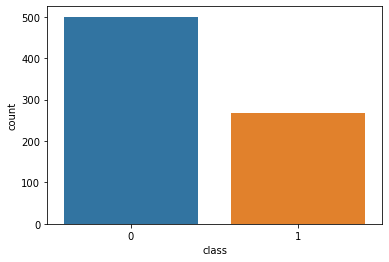

In [8]:
sns.countplot(x="class",data=df)

In [9]:
df["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

In [10]:
df["Preg"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Preg, dtype: int64

In [11]:
def plot_corr(Df,size=10):
    corr = Df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

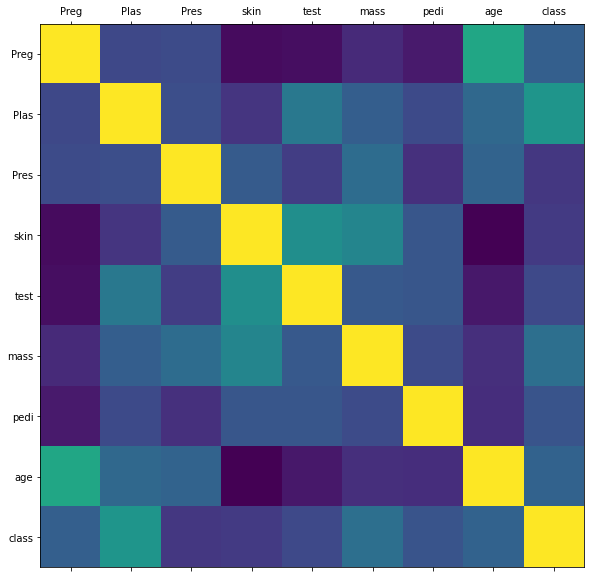

In [12]:
plot_corr(df)

<AxesSubplot:xlabel='class', ylabel='age'>

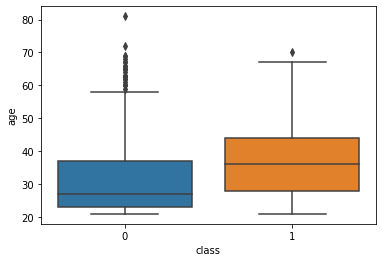

In [13]:
sns.boxplot(x="class",y="age",data=df)

<AxesSubplot:xlabel='class', ylabel='Plas'>

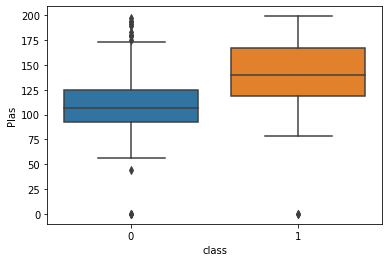

In [14]:
sns.boxplot(x="class",y="Plas",data=df)

<AxesSubplot:xlabel='class', ylabel='Pres'>

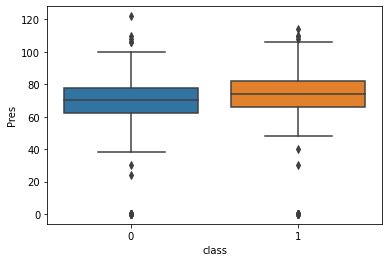

In [15]:
sns.boxplot(x="class",y="Pres",data=df)

In [16]:
#df.drop("pedi",axis=1,inplace=True)

In [17]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
x=df.drop(["class"],axis=1)

In [19]:
y=df["class"]

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=1)

In [21]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
118,4,97,60,23,0,28.2,0.443,22
205,5,111,72,28,0,23.9,0.407,27
506,0,180,90,26,90,36.5,0.314,35
587,6,103,66,0,0,24.3,0.249,29
34,10,122,78,31,0,27.6,0.512,45


from the above few plots, we can see that there are so many values which are 0 on the place of missing values. Like Preg and skin is given which has no meaning.
so we will replace these zeros with mean or meadian of that column. 

In [23]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="median")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,4.0,97.0,60.0,23.0,125.5,28.2,0.443,22.0
1,5.0,111.0,72.0,28.0,125.5,23.9,0.407,27.0
2,3.0,180.0,90.0,26.0,90.0,36.5,0.314,35.0
3,6.0,103.0,66.0,29.0,125.5,24.3,0.249,29.0
4,10.0,122.0,78.0,31.0,125.5,27.6,0.512,45.0


In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.14634634  0.03498977 -0.01527586 -0.004112   -0.00100346  0.10055548
   0.82981313  0.01436756]]
[-8.46502062]


In [27]:
model_score = lr.score(x_train, y_train)
print(model_score)

0.78125


In [28]:
model_score = lr.score(x_test, y_test)
print(model_score)

0.7760416666666666


In [29]:
y_pred=lr.predict(x_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[107,  16],
       [ 27,  42]], dtype=int64)

<AxesSubplot:>

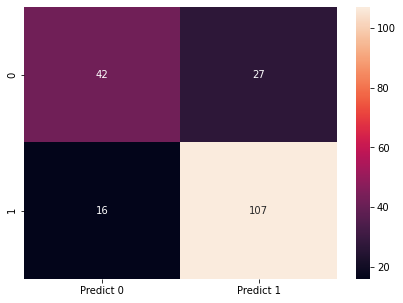

In [31]:
cm = confusion_matrix(y_test,y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

 (TP) 107 are predicted to be diabetic and they are diabetic. 
 (TN) 42 are predicted to be non diabetic and they are non diabetic.
 (FN) 16 are predicted to be non diabetic but they are diabetic.[this can be dangerous]
 (FP) 27 are predicted to be diabetic but they are non diabetic.
